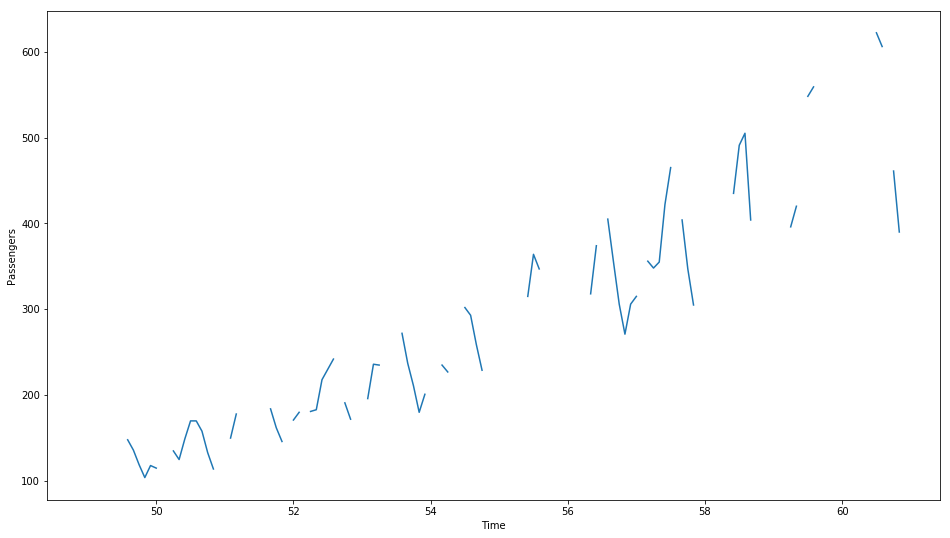

In [201]:
%matplotlib inline

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

csvfile = np.genfromtxt('flights.csv', delimiter=',')
T = csvfile[1:,0]
X = csvfile[1:,1]

plt.figure(figsize=(16,9))
plt.plot(T - 1900, X)
plt.xlabel('Time')
plt.ylabel('Passengers')
M = plt.show()

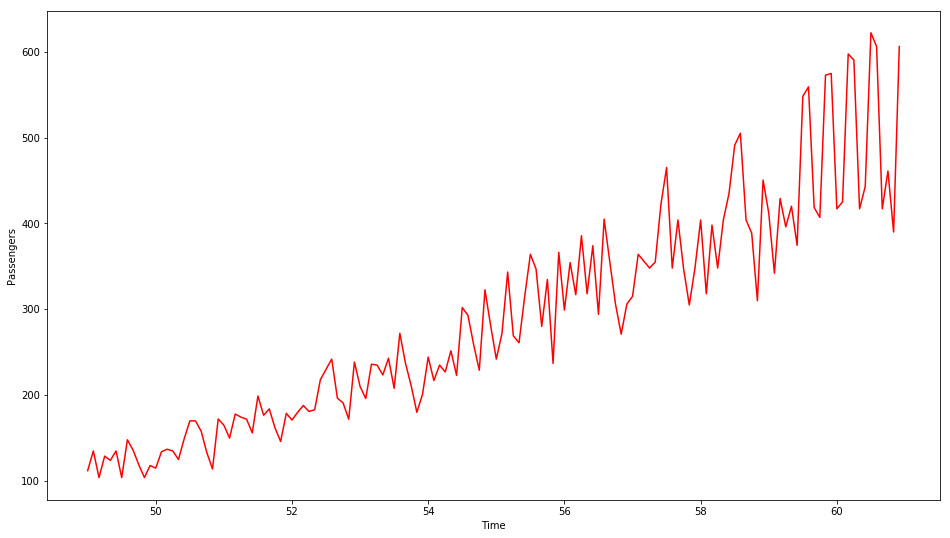

In [216]:
M = 4
# N is used as length of X instead of last index
# Note that it differs from N in pdf
N = len(X)

X_missing_mask = np.isnan(X)
X_observed_mask = ~X_missing_mask

index_arrays = [range(i+M, i, -1) for i in range(0,N-M)]
GX_index_transform = np.stack(index_arrays, axis=0)

GA_base = np.zeros((N-M, N))
GA_base[(range(0, N-M),range(M, N))] = -1

def build_GA(GA_, A_):
    for i in range(0, M):
        GA_[(range(0, N-M),range(i, N-M+i))] = A_[i]
    return GA_    

def least_square(A_, b_):
    U, d, VT = la.svd(A_)
    D = np.diag(d)
    D_pseudo_inverse = np.zeros(A_.shape).T
    D_pseudo_inverse[np.nonzero(D)] = 1/D[np.nonzero(D)]
    x_ = VT.T.dot(D_pseudo_inverse.dot(U.T.dot(b_)))
    return x_

# fill missing indexes with zero
X_processed = np.where(X_missing_mask, np.zeros(N), X)
A = np.zeros(M)

for j in range(0,400):
    X_m_to_n = X_processed[M:]
    GX = X_processed[GX_index_transform]
    A = least_square(GX, X_m_to_n)
    GA = build_GA(GA_base, A)
    GA_mising = GA[:,X_missing_mask]
    GA_observed = GA[:,X_observed_mask]
    X_observed = X_processed[X_observed_mask]
    X_missing = least_square(GA_mising, -1*GA_observed.dot(X_observed))
    X_processed[X_missing_mask] = X_missing

plt.figure(figsize=(16,9))
plt.plot(T - 1900, X_processed, color='red')
plt.xlabel('Time')
plt.ylabel('Passengers')
M = plt.show()



[  1.00000000e+00   7.38558776e-16  -3.30734865e-16  -1.17356658e-15]


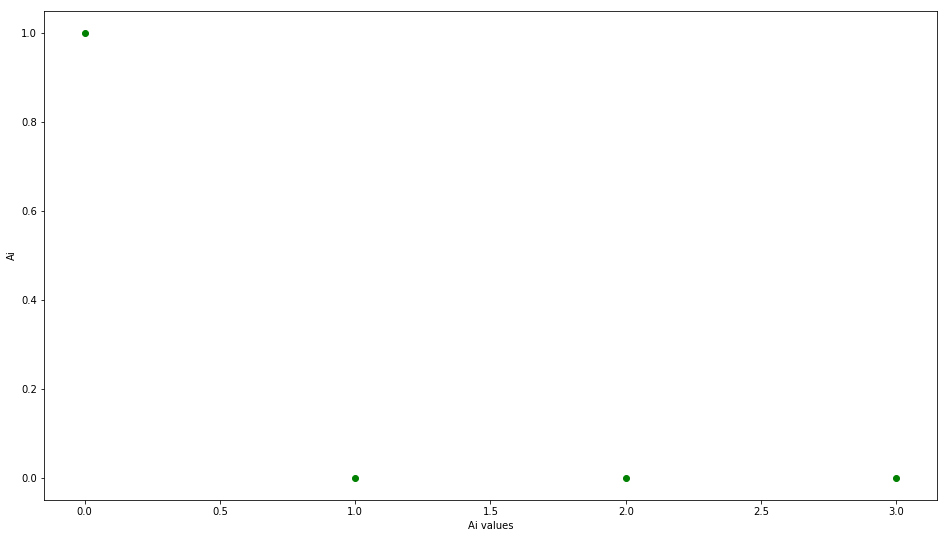

In [227]:
print(A)
plt.figure(figsize=(16,9))
plt.plot([0, 1, 2, 3], A, 'go')
plt.xlabel('Ai values')
plt.ylabel('Ai')
M = plt.show()